In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/CSH Network Simulation ") #changing working directory to google drive

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import importlib
homomul = importlib.import_module("2021_07_12_homophily_multiple_attributes")
homomul_viz = importlib.import_module("2021_12_15_homophily_multi_attr_viz")

## Model inputs

### Number of nodes

In [ ]:
N = 1000

### Population distribution

In [ ]:
## Population fractions

correl_param = 0.4 ## Between 0 and 1
pop_fracs_lst = [[0.1,0.9],[0.5,0.5]] ## Marginal population distributions for each attributes.
# First row is distribution of population along first attribute and second is distribution along second attribute

## Joint population distribution. It's a tensor T where each element T[i1,i2,i3,...,iD] corresponds to the population fraction
## of the group (i1,i2,i3,...,iD). D is the total number of dimensions.?
comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst,correl_param)
pprint(comp_pop_frac_tnsr)

array([[0.04, 0.06],
       [0.46, 0.44]])


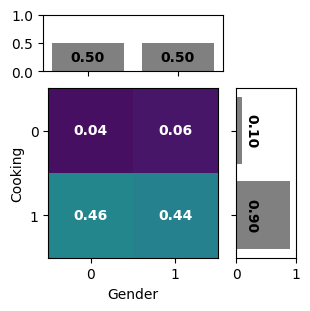

In [ ]:
## Plot population distribution
homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
plt.ylabel("Cooking")
plt.xlabel("Gender")
plt.show()

### Interaction preferences

#### One-dimensional homophily / heterophily matrices

In [ ]:
## One-dimensional matrices of connection preference
h=0.9
h1 = np.array( #Connection Probability Matrix:Each Dimension d encodes the dimensionwise preferences for tie formation between individuals of attributes.There is one matrix per dimesnion.
    [[h,1-h],
     [1-h,h]]
    )
h2 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h_mtrx_lst = np.array([h1,h2])
# Diagonal Values

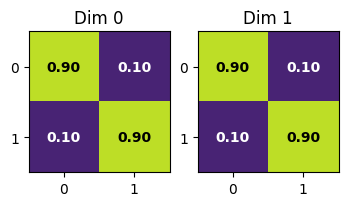

In [ ]:
## Plot homophily / heterophily 1D matrices
plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[0],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 0")
ax = plt.subplot(1,2,2)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[1],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 1")
plt.show()

#### Aggregation type

In [ ]:
kind = "all"
## all -> Attempt connection in every dimension. All attempts must be successful.
## any -> Attempt connection in every dimension. At least one attempt must be successful.
## one -> Attempt connection in one random dimension. The probability of choosing each dimension is given by inpyt array p_d
## max -> Attempt connection in dimension with highest homophily with probability alpha. With probability 1-alpha, random dimension.
## min -> Attempt connection in dimension with lowest homophily with probability alpha. With probability 1-alpha, random dimension.

## Generate network

### Erdos-Renyi style

In [ ]:
G_ER = homomul.am_v3(
            h_mtrx_lst,
            comp_pop_frac_tnsr,
            kind=kind,
            directed=True,
            pop_fracs_lst = pop_fracs_lst,
            N=N,
            v = 1, ## Verbosity
            ## Interaction-specific params
            alpha = None,
            p_d = None
            )

100%|██████████| 1000/1000 [00:13<00:00, 74.65it/s]


In [ ]:
pprint(dict(G_ER.nodes(data=True)))

{0: {'attr': (1, 1)},
 1: {'attr': (1, 1)},
 2: {'attr': (1, 1)},
 3: {'attr': (1, 0)},
 4: {'attr': (1, 0)},
 5: {'attr': (1, 1)},
 6: {'attr': (1, 0)},
 7: {'attr': (1, 1)},
 8: {'attr': (1, 1)},
 9: {'attr': (1, 1)},
 10: {'attr': (1, 0)},
 11: {'attr': (1, 1)},
 12: {'attr': (1, 0)},
 13: {'attr': (1, 0)},
 14: {'attr': (1, 1)},
 15: {'attr': (1, 0)},
 16: {'attr': (1, 1)},
 17: {'attr': (1, 1)},
 18: {'attr': (1, 0)},
 19: {'attr': (1, 0)},
 20: {'attr': (1, 0)},
 21: {'attr': (1, 0)},
 22: {'attr': (1, 0)},
 23: {'attr': (1, 0)},
 24: {'attr': (1, 1)},
 25: {'attr': (1, 1)},
 26: {'attr': (1, 1)},
 27: {'attr': (1, 1)},
 28: {'attr': (1, 0)},
 29: {'attr': (1, 0)},
 30: {'attr': (1, 0)},
 31: {'attr': (0, 1)},
 32: {'attr': (1, 0)},
 33: {'attr': (1, 0)},
 34: {'attr': (1, 0)},
 35: {'attr': (1, 1)},
 36: {'attr': (1, 0)},
 37: {'attr': (1, 0)},
 38: {'attr': (0, 1)},
 39: {'attr': (1, 1)},
 40: {'attr': (1, 0)},
 41: {'attr': (1, 0)},
 42: {'attr': (1, 0)},
 43: {'attr': (1, 0)}

In [ ]:
pprint(list(G_ER.edges()))

Streaming output truncated to the last 5000 lines.
 (987, 362),
 (987, 365),
 (987, 368),
 (987, 370),
 (987, 372),
 (987, 374),
 (987, 376),
 (987, 378),
 (987, 381),
 (987, 382),
 (987, 385),
 (987, 386),
 (987, 387),
 (987, 388),
 (987, 390),
 (987, 395),
 (987, 396),
 (987, 398),
 (987, 399),
 (987, 403),
 (987, 405),
 (987, 408),
 (987, 409),
 (987, 410),
 (987, 413),
 (987, 414),
 (987, 415),
 (987, 417),
 (987, 418),
 (987, 421),
 (987, 424),
 (987, 431),
 (987, 432),
 (987, 435),
 (987, 436),
 (987, 440),
 (987, 441),
 (987, 442),
 (987, 445),
 (987, 448),
 (987, 449),
 (987, 451),
 (987, 456),
 (987, 457),
 (987, 459),
 (987, 461),
 (987, 462),
 (987, 463),
 (987, 464),
 (987, 465),
 (987, 466),
 (987, 467),
 (987, 468),
 (987, 469),
 (987, 472),
 (987, 474),
 (987, 476),
 (987, 479),
 (987, 481),
 (987, 485),
 (987, 487),
 (987, 489),
 (987, 490),
 (987, 491),
 (987, 493),
 (987, 497),
 (987, 501),
 (987, 502),
 (987, 503),
 (987, 506),
 (987, 507),
 (987, 515),
 (987, 516),


In [ ]:
## Export the network in gexf format to visualize it with gephi: https://gephi.org/
G_out = homomul.G_attr_to_str(G_ER,"attr")
nx.write_gexf(G_out, "/content/drive/MyDrive/CSH Network Simulation")